In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
import seaborn as sns
import statistics
from IPython.display import display
pd.options.display.max_columns = 200
pd.set_option('display.max_rows', None)
#It computes the probability of an event occurrence.

In [2]:
train = pd.read_csv("../Data/train.csv")

In [5]:
train.shape

(891, 12)

In [7]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [10]:
train['Embarked']=train['Embarked'].fillna(statistics.mode(train[0]))


In [11]:
train['Age'] = train['Age'].fillna(statistics.median(train[~train['Age'].isna()]['Age']))


In [13]:
statistics.median(train[~train['Age'].isna()]['Age'])

28.0

In [14]:
train['Age'].isnull().sum()

0

In [17]:
cormat

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.034212,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.057527,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000


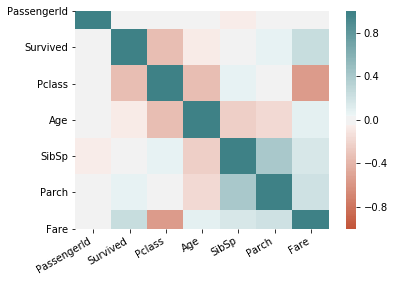

In [18]:
ax = sns.heatmap(
    cormat, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 200, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=30,
    horizontalalignment='right'
);

In [20]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
eliminateVariables = ['Name','Ticket']
train = train.drop(eliminateVariables,axis= 1)


In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [24]:
dummy1 = pd.get_dummies(train['Sex'])
train = pd.concat([dummy1,train], axis=1)

In [25]:
dummy2 = pd.get_dummies(train['Pclass'])
td = pd. concat([dummy2, train], axis = 1)

In [26]:
dummy4 = pd.get_dummies(train['Embarked'])
train = pd. concat([dummy4, td], axis = 1)

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
C              891 non-null uint8
Q              891 non-null uint8
S              891 non-null uint8
1              891 non-null uint8
2              891 non-null uint8
3              891 non-null uint8
female         891 non-null uint8
male           891 non-null uint8
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(3), uint8(8)
memory usage: 76.7+ KB


In [28]:
EV = ['Pclass', 'Cabin', 'Embarked','PassengerId','Sex']
train = train.drop(EV, axis =1)

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
C           891 non-null uint8
Q           891 non-null uint8
S           891 non-null uint8
1           891 non-null uint8
2           891 non-null uint8
3           891 non-null uint8
female      891 non-null uint8
male        891 non-null uint8
Survived    891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
dtypes: float64(2), int64(3), uint8(8)
memory usage: 41.9 KB


In [32]:
train.head()

,C,Q,S,1,2,3,female,male,Survived,Age,SibSp,Parch,Fare
0,0,0,1,0,0,1,0,1,0,22.0,1,0,7.2500
1,1,0,0,1,0,0,1,0,1,38.0,1,0,71.2833
2,0,0,1,0,0,1,1,0,1,26.0,0,0,7.9250
3,0,0,1,1,0,0,1,0,1,35.0,1,0,53.1000
4,0,0,1,0,0,1,0,1,0,35.0,0,0,8.0500


In [35]:
x = train.drop('Survived', axis =1)

In [36]:
y = train['Survived']

<h5>Splitting the data into train and test<h5>

In [95]:
from sklearn.model_selection import train_test_split
sv_train, sv_test, tv_train, tv_test =train_test_split(x, y, test_size = 0.25,random_state=1)

In [96]:
from sklearn.linear_model import LogisticRegression

In [97]:
logReg = LogisticRegression()

In [98]:
model = LogisticRegression().fit(sv_train, tv_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [99]:
train_prediction = model.predict(sv_train)

In [100]:
test_prediction = model.predict(sv_test)

In [101]:
from sklearn import metrics

In [102]:

cnf_matrix = metrics.confusion_matrix(tv_test, prediction)
cnf_matrix

ValueError: Found input variables with inconsistent numbers of samples: [223, 668]

Text(0.5, 257.44, 'Predicted label')

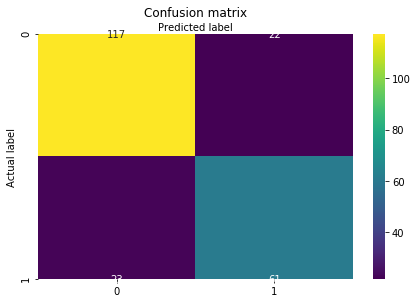

In [103]:
fig, ax = pt.subplots()
#pt.xticks(tick_marks, tv_train)
#pt.yticks(tick_marks, prediction)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="viridis" ,fmt='g')
ax.xaxis.set_label_position("top")
pt.tight_layout()
pt.title('Confusion matrix', y=1.1)
pt.ylabel('Actual label')
pt.xlabel('Predicted label')

In [156]:
print("Accuracy", metrics.accuracy_score(tv_test, prediction))
print("Precision", metrics.precision_score(tv_test, prediction))
print("Recall", metrics.recall_score(tv_test, prediction))

ValueError: Found input variables with inconsistent numbers of samples: [223, 668]

In [105]:
print("Accuracy", metrics.accuracy_score(tv_train, train_prediction))
print("Precision", metrics.precision_score(tv_train, train_prediction))
print("Recall", metrics.recall_score(tv_train, train_prediction))

Accuracy 0.812874251497006
Precision 0.7747747747747747
Recall 0.6963562753036437


In [106]:
from sklearn.ensemble import RandomForestClassifier 


m = RandomForestClassifier(n_estimators=8, max_depth=8,  bootstrap=False, min_samples_split=10)
m.fit(sv_train, tv_train)
#draw_tree(m.estimators_[0], sv_train, precision=2)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=8,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [107]:
RF_Prediction_train = m.predict(sv_train)


RF_Prediction_test = m.predict(sv_test)


In [109]:
print("Accuracy:",metrics.accuracy_score(tv_train, RF_Prediction_train))
print("Precision:",metrics.precision_score(tv_train, RF_Prediction_train))
print("Recall:",metrics.recall_score(tv_train, RF_Prediction_train))

Accuracy: 0.905688622754491
Precision: 0.9466019417475728
Recall: 0.7894736842105263


In [110]:
print("Accuracy:",metrics.accuracy_score(tv_test, RF_Prediction_test))
print("Precision:",metrics.precision_score(tv_test, RF_Prediction_test))
print("Recall:",metrics.recall_score(tv_test, RF_Prediction_test))

Accuracy: 0.8026905829596412
Precision: 0.8805970149253731
Recall: 0.6210526315789474


In [111]:
testdata =  pd.read_csv('../Data/test.csv')

In [114]:
testdata

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.50,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.00,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.00,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.00,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.00,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.00,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.00,2,0,A/4 48871,24.1500,NaN,S


In [116]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [126]:
testdata.describe(include = 'all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [122]:
testdata.shape

(418, 11)

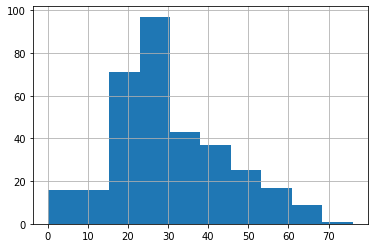

In [125]:
testdata['Age'].hist(bins = 10)

In [121]:
testdata.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [127]:
testdata['Age'] = testdata['Age'].fillna('28')

In [130]:
testdata['Age'].isnull().sum()

0

In [132]:
testdata['Fare'] = testdata['Fare']. fillna(32.204208)

In [134]:
testdata.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [136]:
testdata = testdata.drop(['PassengerId','Name', 'Cabin'], axis=1)

In [139]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
Pclass      418 non-null int64
Sex         418 non-null object
Age         418 non-null object
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        418 non-null float64
Embarked    418 non-null object
dtypes: float64(1), int64(3), object(4)
memory usage: 26.2+ KB


In [142]:
testdata['Age'] = pd.to_numeric(testdata['Age'])


In [143]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
Pclass      418 non-null int64
Sex         418 non-null object
Age         418 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        418 non-null float64
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(3)
memory usage: 26.2+ KB


In [145]:
dummy6 = pd.get_dummies(testdata['Sex'])
testdata = pd.concat([dummy6,testdata], axis=1)#done

In [146]:
dummy5 = pd.get_dummies(testdata['Pclass'])

testdata = pd.concat([dummy5,testdata], axis=1)#done

In [147]:
dummy7 = pd.get_dummies(testdata['Embarked'])
testdata = pd.concat([dummy7,testdata], axis = 1)#i imputed the dummies into td i.e for train data so please `


In [151]:
testdata = testdata.drop(['Sex','Embarked','Pclass'], axis = 1)

In [148]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
C           418 non-null uint8
Q           418 non-null uint8
S           418 non-null uint8
1           418 non-null uint8
2           418 non-null uint8
3           418 non-null uint8
female      418 non-null uint8
male        418 non-null uint8
Pclass      418 non-null int64
Sex         418 non-null object
Age         418 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        418 non-null float64
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(3), uint8(8)
memory usage: 29.5+ KB


In [157]:
testdata = testdata.drop('Ticket', axis= 1)

In [158]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
C         418 non-null uint8
Q         418 non-null uint8
S         418 non-null uint8
1         418 non-null uint8
2         418 non-null uint8
3         418 non-null uint8
female    418 non-null uint8
male      418 non-null uint8
Age       418 non-null float64
SibSp     418 non-null int64
Parch     418 non-null int64
Fare      418 non-null float64
dtypes: float64(2), int64(2), uint8(8)
memory usage: 16.5 KB


In [159]:
A=set(sv_train.columns)
B=set(testdata.columns)


In [160]:
print(len(A)
print(len(B))

12
12


In [168]:
submission = pd.read_csv('../Data/gender_submission.csv')

In [169]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [172]:
kaggletestdata_prediction = model.predict(testdata)

In [171]:
PassengerId = submission['PassengerId']

In [174]:
from sklearn.ensemble import RandomForestClassifier 


m = RandomForestClassifier(n_estimators=8, max_depth=8,  bootstrap=False, min_samples_split=10)
m.fit(sv_train, tv_train)
#draw_tree(m.estimators_[0], sv_train, precision=2)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=8,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [179]:
RF_Prediction_Kaggledataset = m.predict(testdata)


In [180]:
#RF_Prediction3 #stored in output for RF_prediction
pd.DataFrame({'PassengerId': PassengerId, 'Survived': RF_Prediction_Kaggledataset} ).to_csv('../Output/gender_submission.csv')